# Basic Quantum Computing: A Mathematical Approach

In this notebook, I give an overview of some of the basic gates in quantum circuits and show the mathematical operation they perform. I also show that these gates give the expected result in Qiskit. Basic knowledge of matrix algebra is useful to understand the math I discuss here.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

## Introduction

In classical computers, bits are used to represent information and are characterized as either 0 or 1. In quantum computers, qubits are used to represent information and are characterized by a linear superposition of its orthonormal basis states. For a single qubit, the basis is made up of the following vectors:

$$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$

$$\vert1\rangle = \begin{bmatrix}0\\1\end{bmatrix}$$

In quantum mechanics, these basis states are called "pure states."

In the cells below, I initialize a quantum circuit with one qubit and one classical bit which can be used to read out the results of the circuit. I will apply no gates to this circuit to demonstrate that the convention for the starting state of a qubit is $\vert0\rangle$.

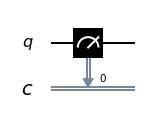

In [2]:
# Initialize a quantum circuit with one qubit and one classical bit for readout
cir = QuantumCircuit(1,1)

# Perform a measurement on the qubit that reads out to the classical bit. 0 is the index for both the qubit and the classical bit
cir.measure(0,0)

# Draw the circuit
cir.draw('mpl')

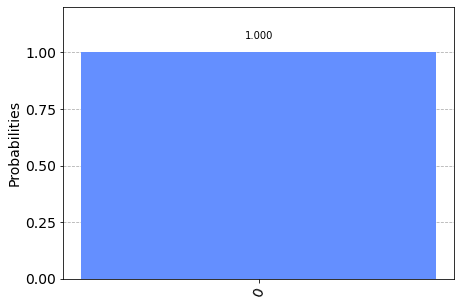

In [3]:
# Choose a quantum computer simulator on which to execute the circuit
sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the chosen simulator 100 times
result = execute(cir, sim, shots=100).result()

# Count the number of times the classical bit read out 0 or 1
counts = result.get_counts(cir)

# Plot the histogram of the counts
plot_histogram(counts)

As you can see, the circuit read out 0 every time. This is because there was no operation on the circuit to change the qubit from its initial state of $\vert0\rangle$. If we want to change the output of our single-qubit circuit, there are several simple gates we can apply.

## The Pauli-X Gate

The $X$ gate serves to perform a "bit flip." In classical computing, a bit flip changes a classical bit from a 0 to a 1 or vice versa. In a quantum circuit, the $X$ gate will perform a simple bit flip on a qubit in state $\vert0\rangle$ or $\vert1\rangle$. Mathematically, the $X$ gate can be represented by the following matrix:

$$\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

In the cells below, I show the mathematical result of applying the the $X$ gate to either pure state.

In [4]:
# Matrix representation of a qubit in state |0 >
qu0 = np.matrix([[1],[0]])

# Matrix representation of a qubit in state |1 >
qu1 = np.matrix([[0],[1]])

# Matrix representation of the X gate
x_gate = np.matrix([[0,1],[1,0]])

print("0 state qubit:")
print(qu0)
print("1 state qubit:")
print(qu1)

print("X gate matrix:")
print(x_gate)

0 state qubit:
[[1]
 [0]]
1 state qubit:
[[0]
 [1]]
X gate matrix:
[[0 1]
 [1 0]]


In [5]:
# Apply X gate matrix to 0 state qubit matrix
qu0_x = x_gate.dot(qu0)

# Apply X gate matrix to 1 state qubit matrix
qu1_x = x_gate.dot(qu1)

print("X gate applied to 0 state qubit:")
print(qu0_x)

print("X gate applied to 1 state qubit:")
print(qu1_x)

X gate applied to 0 state qubit:
[[0]
 [1]]
X gate applied to 1 state qubit:
[[1]
 [0]]


As we expected, the $X$ gate performs a bit flip, changing the qubit in the $\vert0\rangle$ state to the $\vert1\rangle$ state and vice versa. In the following cells, I test this with a Qiskit quantum circuit.

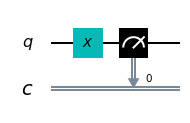

In [6]:
cir = QuantumCircuit(1,1)

# Apply the X gate to the circuit. 0 is the index for the qubit we apply the gate to
cir.x(0)

cir.measure(0,0)
cir.draw('mpl')

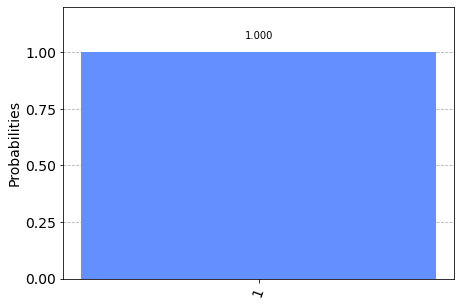

In [7]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

The quantum circuit yields the same results as the math. Our qubit begins in state $\vert0\rangle$, the $X$ gate is applied, changing its state to $\vert1\rangle$, and the classical bit reads out 1 every time.

## The Hadamard Gate

The Hadamard gate, or the $H$ gate, serves to put a qubit into superposition. In quantum mechanics, this means that the qubit is in both the $\vert0\rangle$ and $\vert1\rangle$ states. The Hadamard gate can be represented as the following matrix:

$$\frac{1}{\sqrt{2}}  \begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$$

In the cells below, I show the mathematical result of applying the Hadamard gate to either pure state.

In [9]:
# Matrix representation of the Hadamard gate
h_gate = np.matrix([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]])
print('Hadamard gate matrix:')
print(h_gate)

Hadamard gate matrix:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [10]:
# Apply the Hadamard gate to 0 state qubit matrix
qu0_h = h_gate.dot(qu0)

# Apply the Hadamard gate to 1 state qubit matrix
qu1_h = h_gate.dot(qu1)

print("Hadamard gate applied to 0 state qubit:")
print(qu0_h)

print("Hadamard gate applied to 1 state qubit:")
print(qu1_h)

Hadamard gate applied to 0 state qubit:
[[0.70710678]
 [0.70710678]]
Hadamard gate applied to 1 state qubit:
[[ 0.70710678]
 [-0.70710678]]


Let's look at our result when the Hadamard gate is applied to the qubit in state $\vert0\rangle$:

$$ \begin{bmatrix}1/\sqrt{2}\\1/\sqrt{2}\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}1\\1\end{bmatrix}$$

We can rewrite this result as a linear combination of the basis states:

$$ \frac{1}{\sqrt{2}} \begin{bmatrix}1\\0\end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix}0\\1\end{bmatrix} = \frac{1}{\sqrt{2}} \vert0\rangle + \frac{1}{\sqrt{2}} \vert1\rangle$$

In quantum mechanics, we call this linear combination of pure states a "mixed state." In this state, the qubit is in superposition.

We can rewrite the result for the Hadamard gate applied to the qubit in state $\vert1\rangle$ similarly:

$$ \begin{bmatrix}1/\sqrt{2}\\-1/\sqrt{2}\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}1\\-1\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}1\\0\end{bmatrix} - \frac{1}{\sqrt{2}} \begin{bmatrix}0\\1\end{bmatrix} = \frac{1}{\sqrt{2}} \vert0\rangle - \frac{1}{\sqrt{2}} \vert1\rangle$$

When a qubit is measured in a mixed state, it will "collapse" into a pure state. Quantum mechanics tells us that the probability of a qubit collapsing into either pure state is the square of the coefficient in front of that state. So, for the qubit originally in state $\vert0\rangle$:

$$ P\left(\vert0\rangle\right) = \left( \frac{1}{\sqrt{2}} \right) ^{2} = \frac{1}{2} $$

$$ P\left(\vert1\rangle\right) = \left( \frac{1}{\sqrt{2}} \right) ^{2} = \frac{1}{2} $$

Similarly, for the qubit originally in state $\vert1\rangle$:

$$ P\left(\vert0\rangle\right) = \left( \frac{1}{\sqrt{2}} \right) ^{2} = \frac{1}{2} $$

$$ P\left(\vert1\rangle\right) = \left( \frac{-1}{\sqrt{2}} \right) ^{2} = \frac{1}{2} $$

Interestingly, even though the mathematical results are different, both circuits have an equal probability of measuring $\vert0\rangle$ or $\vert1\rangle$. In the following cells, I will test this with two quantum circuits.

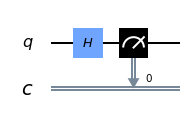

In [11]:
cir = QuantumCircuit(1,1)

# Apply the Hadamard gate to the circuit. 0 is the index for the qubit we apply the gate to
cir.h(0)

cir.measure(0,0)
cir.draw('mpl')

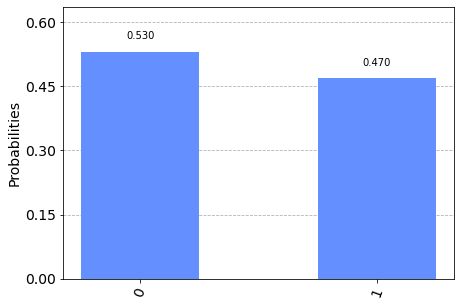

In [13]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

For each of the 100 runs, there is an equal probability of measuring $\vert0\rangle$ or $\vert1\rangle$, so there isn't any guarantee that each state will be measured the same number of times. If you re-run the cell above multiple times, you will likely get slightly different results. However, each time, the two states should be measured a relatively similar number of times. Imagine flipping a penny 100 times - there's an equal probability of getting heads or tails for each flip, but you might not necessarily get 50 heads and 50 tails. In the next cells, I will apply an $X$ gate to put the qubit into state $\vert1\rangle$ before applying the Hadamard gate.

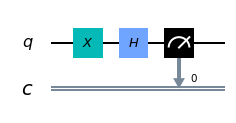

In [14]:
cir = QuantumCircuit(1,1)

# Apply the X gate to the qubit to put the qubit in state |1 >
cir.x(0)

cir.h(0)

cir.measure(0,0)
cir.draw('mpl')

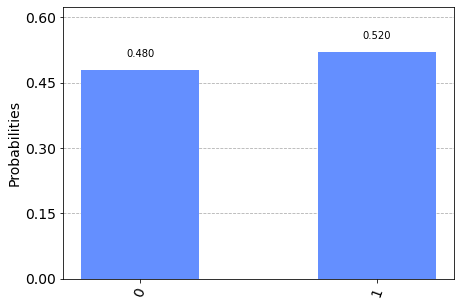

In [15]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

Again, both states are measured a relatively equal number of times. Just as we expected when we calculated the probabilities, the circuits yield the same result.